# Лабораторная работа 3. Полиномиальная регрессия. Регуляризация

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

### Задание 1. Полиномиальная регрессия

Загрузите данные из файлов `ml_lab1_train.txt` и `ml_lab1_test.txt` (первая лабораторная работа).

Для $k = 1,2,3,\ldots,10$ найдите полином ${f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость.

Выведите коэффициенты полиномов и нарисуйте их графики на одном чертеже вместе с точками данных $(x_i, y_i)$ (возможно, чертеж стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

Для каждого из полиномов найдите среднеквадратическую ошибку $MSE$ и коэффициент детерминации $R^2$ на обучающих данных и на тестовых данных. Постройте графики зависимости $MSE$ на обучающих и тестовых данных в зависимости от степени полинома (должно быть три графика: один для обучающих данных, второй – для тестовых, третий – для обоих видов данных вместе).

Сделайте вывод, что происходит с ошибкой на обучающих и тестовых данных с увеличением степени полинома.

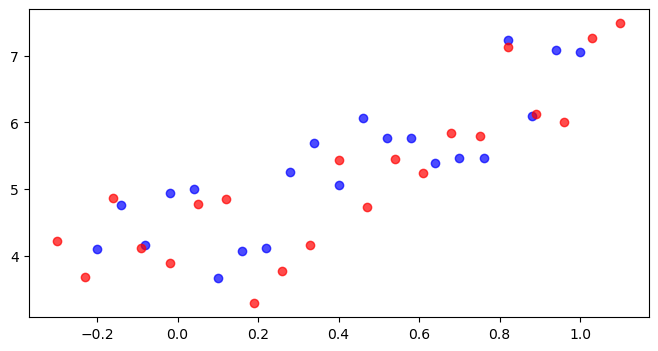

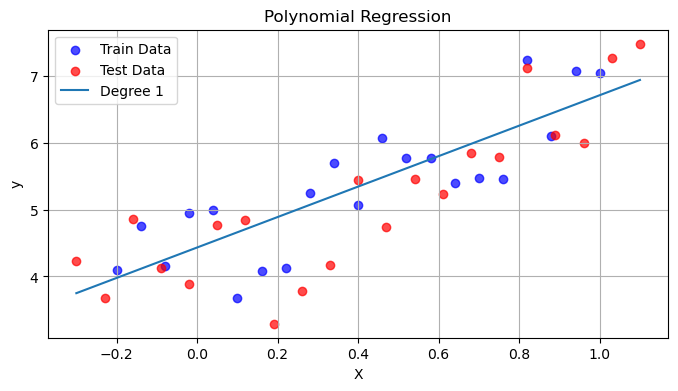

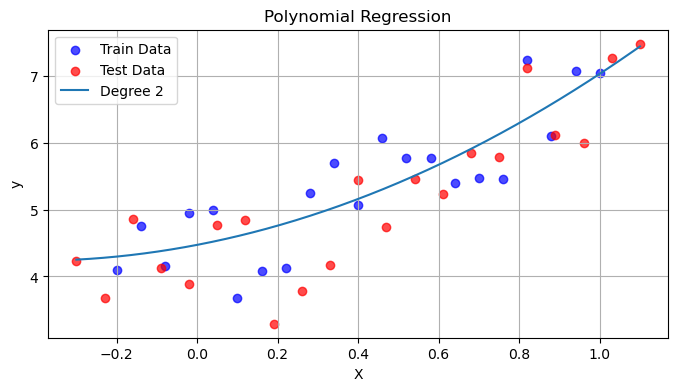

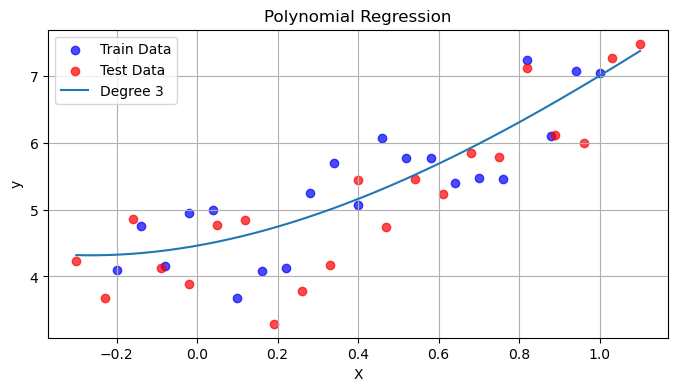

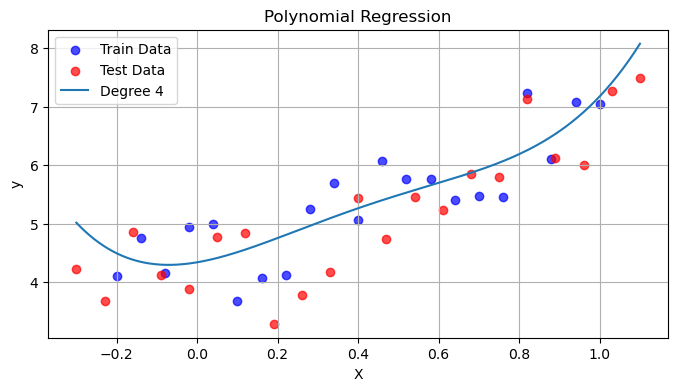

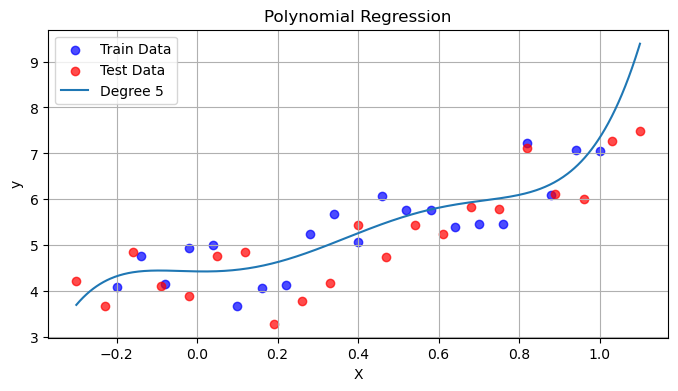

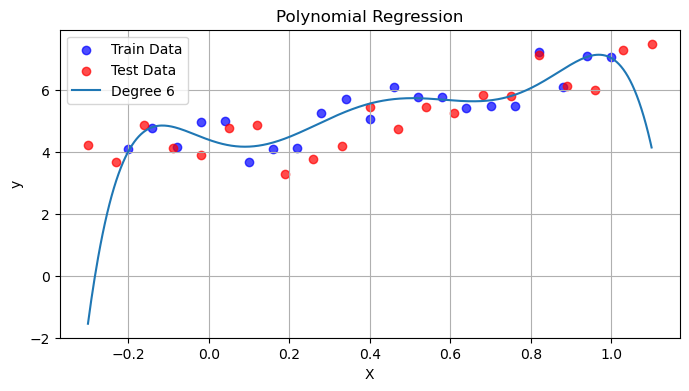

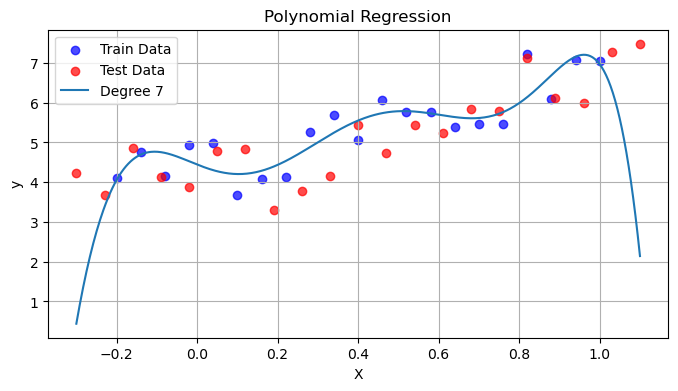

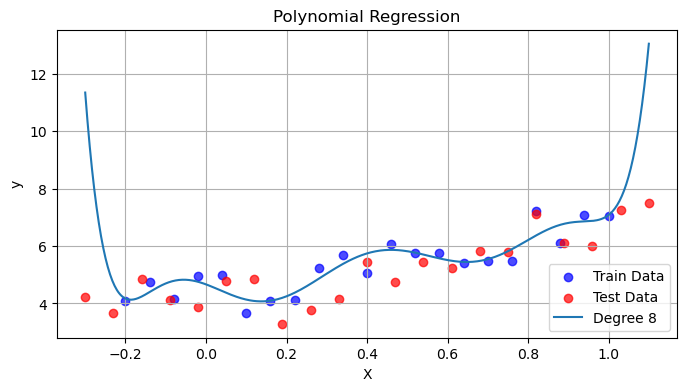

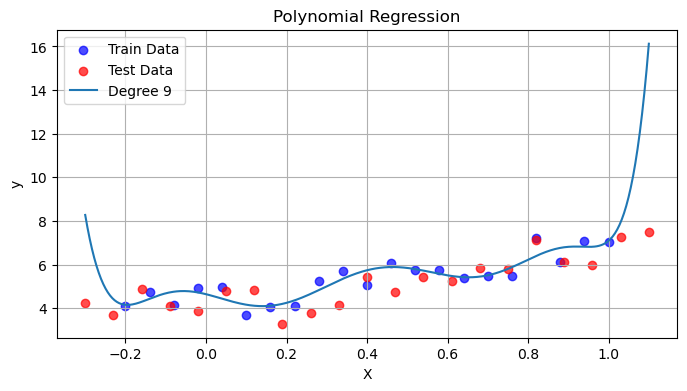

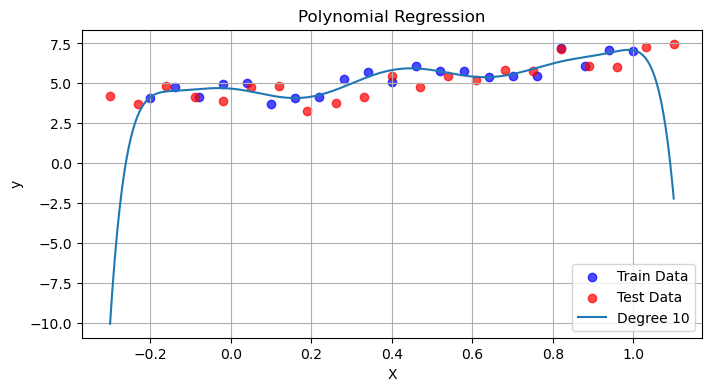

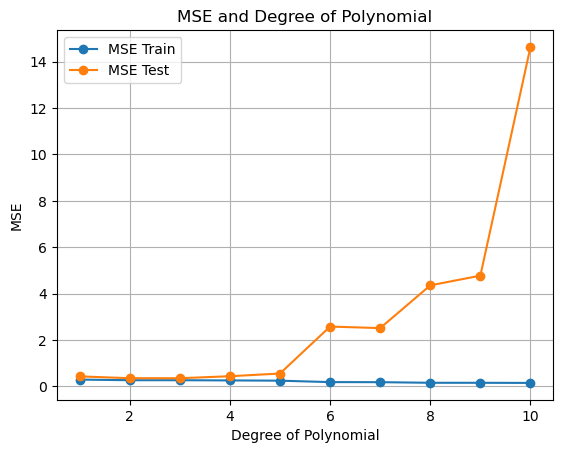

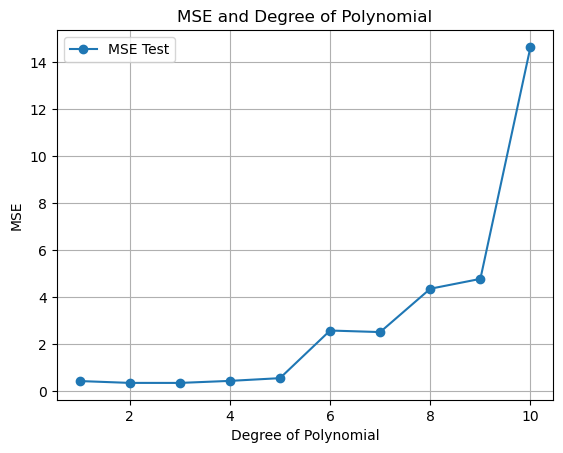

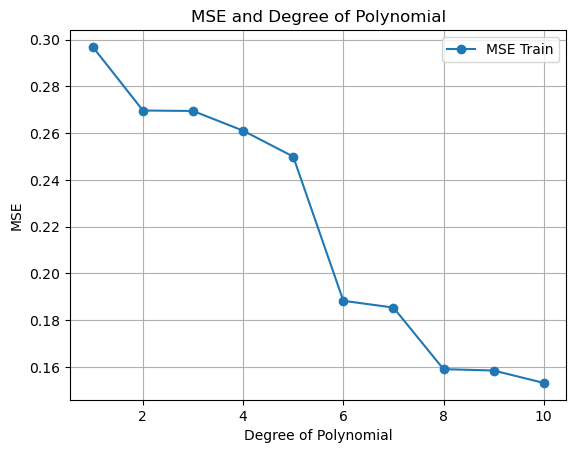

   Degree  MSE Train   MSE Test  R^2 Train  R^2 Test
0       1   0.296897   0.435120   0.697835  0.684880
1       2   0.269699   0.356476   0.725515  0.741835
2       3   0.269497   0.355346   0.725721  0.742653
3       4   0.261067   0.441727   0.734301  0.680095
4       5   0.249985   0.557973   0.745579  0.595908
5       6   0.188293   2.581693   0.808365 -0.869697
6       7   0.185396   2.515783   0.811314 -0.821964
7       8   0.159056   4.357289   0.838122 -2.155607
8       9   0.158472   4.776342   0.838716 -2.459091
9      10   0.153166  14.632428   0.844116 -9.597000


In [2]:
train_data = np.loadtxt("../data/ml_lab1_train.txt", delimiter=",")
test_data = np.loadtxt("../data/ml_lab1_test.txt", delimiter=",")
X_train, y_train = train_data[:, 0].reshape(-1, 1), train_data[:, 1]
X_test, y_test = test_data[:, 0].reshape(-1, 1), test_data[:, 1]
degrees = range(1, 11)

mse_train = []
mse_test = []
r2_train = []
r2_test = []

plt.figure(figsize=(8, 4))
plt.scatter(X_train, y_train, color="blue", label="Train Data", alpha=0.7)
plt.scatter(X_test, y_test, color="red", label="Test Data", alpha=0.7)
plt.show()

for k in degrees:
    poly = PolynomialFeatures(degree=k)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)
    x_plot = np.linspace(min(X_train.min(), X_test.min()), max(X_train.max(), X_test.max()), 500).reshape(-1, 1)
    y_plot = model.predict(poly.transform(x_plot))
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))
    r2_train.append(r2_score(y_train, y_train_pred))
    r2_test.append(r2_score(y_test, y_test_pred))
    plt.figure(figsize=(8, 4))
    plt.scatter(X_train, y_train, color="blue", label="Train Data", alpha=0.7)
    plt.scatter(X_test, y_test, color="red", label="Test Data", alpha=0.7)
    plt.plot(x_plot, y_plot, label=f"Degree {k}")
    plt.title("Polynomial Regression")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid()
    plt.show()

# MSE
plt.plot(degrees, mse_train, label="MSE Train", marker="o")
plt.plot(degrees, mse_test, label="MSE Test", marker="o")
plt.title("MSE and Degree of Polynomial")
plt.xlabel("Degree of Polynomial")
plt.ylabel("MSE")
plt.legend()
plt.grid()
plt.show()

plt.plot(degrees, mse_test, label="MSE Test", marker="o")
plt.title("MSE and Degree of Polynomial")
plt.xlabel("Degree of Polynomial")
plt.ylabel("MSE")
plt.legend()
plt.grid()
plt.show()

plt.plot(degrees, mse_train, label="MSE Train", marker="o")
plt.title("MSE and Degree of Polynomial")
plt.xlabel("Degree of Polynomial")
plt.ylabel("MSE")
plt.legend()
plt.grid()
plt.show()

data = {
    "Degree": degrees,
    "MSE Train": mse_train,
    "MSE Test": mse_test,
    "R^2 Train": r2_train,
    "R^2 Test": r2_test
}
df = pd.DataFrame(data)
print(df)

### Задание 2. Регуляризация

Вспомним, что задачу линейной регрессии (нахождение вектора коэффициентов $\overrightarrow{w}_{opt}$) можно решить при помощи нормального уравнения:

$$\overrightarrow{w}_{opt} = \left(X^TX\right)^{-1}X^T\overrightarrow{y}.$$

Если строки или столбцы матрицы $X$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не может быть решена с помощью нормального уравнения (придется использовать, например, градиентный спуск). На практике различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место *переобучение* (overfitting). Один из симптомов этой проблемы – необычно большие по модулю компоненты вектора $\overrightarrow{w}_{opt}$.

Один из способов борьбы с переобучением – **регуляризация**. Сейчас мы рассмотрим одну из её разновидностей – **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \alpha I)$, где $\alpha$ – параметр регуляризации, $I$ – единичная матрица. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение:

$$\overrightarrow{w}_{opt} = (X^TX + \alpha I)^{-1}X^T\overrightarrow{y}$$

и снижаем эффект переобучения. Параметр $\alpha$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала. 

Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации полиномом шестой степени довольно высокая. Убедитесь, что, используя регуляризацию с хорошо подобранным параметром $\alpha$, ошибку на тестовой выборке можно сделать не больше, чем для полинома оптимальной степени в модели без регуляризации. Для этого $\alpha$ сравните $\det(X^TX)$ и $\det(X^TX + \alpha I)$.

Изобразите на графике три полинома: полином оптимальной степени без регуляризации, полином шестой степени без регуляризации и полином шестой степени с регуляризацией.

In [3]:
X_test_ones = np.c_[np.ones(X_test.shape[0]), X_test]
default = np.linalg.det(X_test_ones.T.dot(X_test_ones))
reg = np.linalg.det(X_test_ones.T.dot(X_test_ones) + 0.1 * np.eye(X_test_ones.shape[1]))
default, reg

(79.23300000000003, 82.05630000000002)

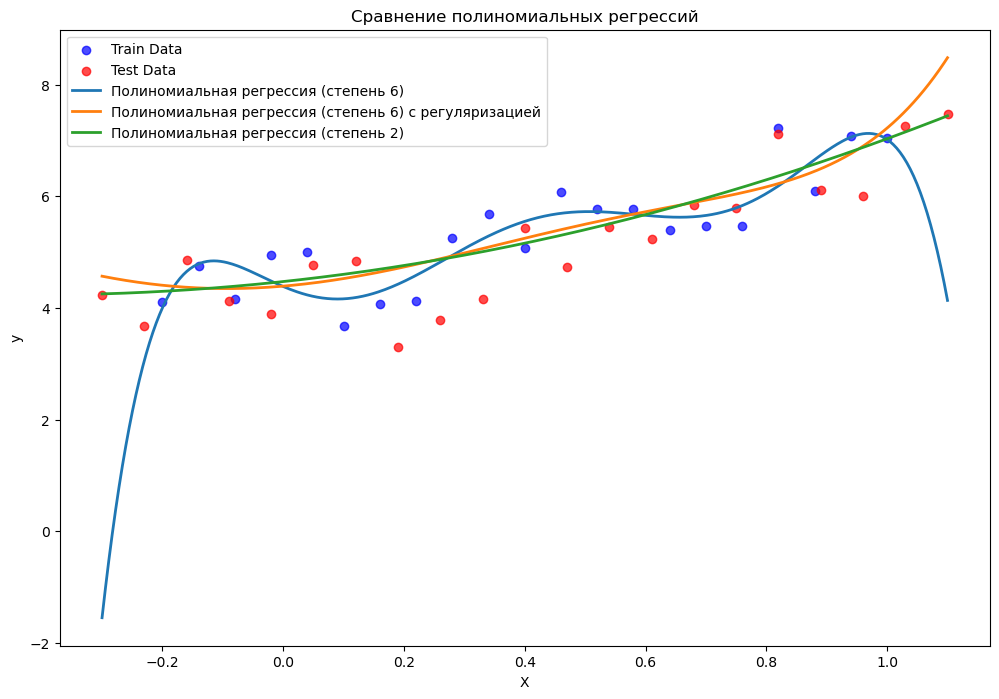

In [4]:
poly = PolynomialFeatures(degree=6)
X_poly_train = poly.fit_transform(X_train)

def get_weights(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

def get_weights_reg(X, y, regularization):
    return np.linalg.inv(X.T.dot(X) + regularization * np.eye(X.shape[1])).dot(X.T).dot(y)

theta = get_weights(X_poly_train, y_train)
y_pred = X_poly_train.dot(theta)
theta_reg = get_weights_reg(X_poly_train, y_train, 0.001)
y_pred_reg = X_poly_train.dot(theta_reg)

# def show_graph(theta, title):
#     plt.figure(figsize=(8, 4))
#     plt.scatter(X_train, y_train, color="blue", label="Train Data", alpha=0.7)
#     plt.scatter(X_test, y_test, color="red", label="Test Data", alpha=0.7)
#     X_range = np.linspace(min(X_train.min(), X_test.min()), max(X_train.max(), X_test.max()), 500).reshape(-1, 1)
#     X_poly_range = poly.transform(X_range)
#     y_range_pred = X_poly_range.dot(theta)
#     plt.plot(X_range, y_range_pred, label="Полиномиальная регрессия", linewidth=2)
#     plt.xlabel('X')
#     plt.ylabel('y')
#     plt.legend()
#     plt.title(f'{title}')
#     plt.show()

plt.figure(figsize=(12, 8))
poly = PolynomialFeatures(degree=6)
X_poly_train = poly.fit_transform(X_train)
theta = get_weights(X_poly_train, y_train)
y_pred = X_poly_train.dot(theta)
X_range = np.linspace(min(X_train.min(), X_test.min()), max(X_train.max(), X_test.max()), 500).reshape(-1, 1)
X_poly_range = poly.transform(X_range)
y_range_pred = X_poly_range.dot(theta)
plt.scatter(X_train, y_train, color="blue", label="Train Data", alpha=0.7)
plt.scatter(X_test, y_test, color="red", label="Test Data", alpha=0.7)
plt.plot(X_range, y_range_pred, label="Полиномиальная регрессия (степень 6)", linewidth=2)
theta_reg = get_weights_reg(X_poly_train, y_train, 0.001)
y_pred_reg = X_poly_train.dot(theta_reg)
y_range_pred_reg = X_poly_range.dot(theta_reg)
plt.plot(X_range, y_range_pred_reg, label="Полиномиальная регрессия (степень 6) с регуляризацией", linewidth=2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
theta_2 = get_weights(X_poly_train, y_train)
X_poly_range_2 = poly.transform(X_range)
y_range_pred_2 = X_poly_range_2.dot(theta_2)
plt.plot(X_range, y_range_pred_2, label="Полиномиальная регрессия (степень 2)", linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Сравнение полиномиальных регрессий')
plt.show()

### Задание 3. Линейная регрессия в scikit-learn

Скачайте файлы ``flats_moscow.txt`` и ``flats_moscow_description.pdf``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков. Вашей задачей будет построить с помощью линейной регрессии зависимость между ценой квартиры и остальными доступными параметрами.

Построив несколько моделей, нужно сравнить их качество. Проверять это на той же выборке, на которой вы обучались, бессмысленно и даже вредно (вспомните пример с полиномами: как хорошо падала ошибка на обучающей выборке с ростом степени и как быстро росла ошибка на тестовых данных!). Поэтому вам нужно будет разделить выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели набора данных упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split`.

Постройте следующие модели линейной регрессии по методу наименьших квадратов:

1. на основе собственной функции (нормальное уравнение);

1. с L2-регуляризацией на основе собственной функции – параметр регуляризации нужно подобрать;

1. собственную реализацию полиномиальной регрессии – степень полинома нужно подобрать;

1. на основе функции `LinearRegression` из `scikit-learn`;

1. с L2-регуляризацией на основе функции `Ridge` из `scikit-learn` – параметр регуляризации нужно подобрать;

1. с L1-регуляризацией на основе функции `Lasso` из `scikit-learn` – параметр регуляризации нужно подобрать.

Выведите и сравните регрессионные коэффициенты для всех функций. Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Оцените качество решения задачи, выведя среднеквадратическую ошибку на обучающих и тестовых данных для всех функций. Эти ошибки лучше свести в таблицу (например, используя `pandas.DataFrame`).

In [5]:
from sklearn.model_selection import train_test_split
data = np.loadtxt("../data/flats_moscow.txt", skiprows=1)
y = data[:, 0]
x = data[:, 1:]
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [6]:
X_train_ones = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_ones = np.c_[np.ones(X_test.shape[0]), X_test]
theta = get_weights(X_train_ones, y_train)
mse_norm_train = mean_squared_error(y_train, X_train_ones.dot(theta))
mse_norm = mean_squared_error(y_test, X_test_ones.dot(theta))
print(f"MSE train: {mse_norm_train}, MSE test: {mse_norm}")

MSE train: 857.3952118181703, MSE test: 1212.9018225237246


In [7]:
theta = get_weights_reg(X_train_ones, y_train, 0.001)
mse_norm_l2_train = mean_squared_error(X_train_ones.dot(theta), y_train)
mse_norm_l2 = mean_squared_error(X_test_ones.dot(theta), y_test)
print(f"MSE train: {mse_norm_l2_train}, MSE test: {mse_norm_l2}")

MSE train: 857.3952118237885, MSE test: 1212.90293909962


In [8]:
degrees = range(1, 11)
for k in degrees:
    poly = PolynomialFeatures(degree=k)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    theta = get_weights_reg(X_poly_train, y_train, regularization=0.0001)
    mse_train = mean_squared_error(y_train, X_poly_train.dot(theta))
    mse = mean_squared_error(y_test, X_poly_test.dot(theta))
    print(f"degree: {k} MSE train: {mse_train}, MSE test: {mse}")

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
theta = get_weights_reg(X_poly_train, y_train, regularization=0.0001)
mse_poly_train = mean_squared_error(y_train, X_poly_train.dot(theta))
mse_poly = mean_squared_error(y_test, X_poly_test.dot(theta))


degree: 1 MSE train: 857.3952118182266, MSE test: 1212.9019341846022
degree: 2 MSE train: 728.7590836964271, MSE test: 943.1083203383208
degree: 3 MSE train: 678.5260815643134, MSE test: 1408.673225173476
degree: 4 MSE train: 566.8973729525833, MSE test: 13929.90080740291
degree: 5 MSE train: 380.01241851199956, MSE test: 136822.84106338778
degree: 6 MSE train: 40059.980129094794, MSE test: 5496744.302554841
degree: 7 MSE train: 5953984.204960968, MSE test: 1702731702.5001986
degree: 8 MSE train: 903044743.0075289, MSE test: 129816418222.64572
degree: 9 MSE train: 897503559.826346, MSE test: 90395694217282.23
degree: 10 MSE train: 8081967709.483956, MSE test: 405932526923242.06


In [9]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_train = model_lr.predict(X_train)
y_pred = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
mse_lr_train = mean_squared_error(y_train, y_pred_train)
print(f"MSE train: {mse_lr_train}, MSE test: {mse_lr}")

MSE train: 857.3952118181702, MSE test: 1212.901822523738


In [10]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=0.0001)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)
mse_r = mean_squared_error(y_test, y_pred)
mse_r_train = mean_squared_error(y_train, y_pred_train)
print(f"MSE train: {mse_r_train}, MSE test: {mse_r}")

MSE train: 857.3952118181703, MSE test: 1212.9018219251118


In [11]:
from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.0001)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)
mse_l = mean_squared_error(y_test, y_pred)
mse_l_train = mean_squared_error(y_train, y_pred_train)
print(f"MSE train: {mse_l_train}, MSE test: {mse_l}")

MSE train: 857.3952118262118, MSE test: 1212.9013773346287


Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки (не менее трёх), являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению.

In [12]:
df = pd.read_csv("../data/flats_moscow.txt", delimiter="\t")
df['log_dist'] = np.log(df['dist'])
df['log_metrdist'] = np.log(df['metrdist'])
df['log_totsp'] = np.log(df['totsp'])
y = df.price
df = df.drop(columns=["price"])
x_train, x_test, y_train, y_test = train_test_split(df, y, train_size=0.8, random_state=42)
X_poly_train = poly.fit_transform(x_train)
X_poly_test = poly.transform(x_test)
theta = get_weights_reg(X_poly_train, y_train, regularization=0.0001)
mse_poly_c_train = mean_squared_error(y_train, X_poly_train.dot(theta))
mse_poly_c = mean_squared_error(y_test, X_poly_test.dot(theta))

In [13]:
mse = {
    "Normal MSE": [mse_norm_train, mse_norm],
    "Normal L2": [mse_norm_l2_train, mse_norm_l2],
    "Poly MSE": [mse_poly_train, mse_poly],
    "Ridge MSE": [mse_r_train, mse_r],
    "Lasso MSE": [mse_l_train, mse_l],
    "Poly MSE with new cols": [mse_poly_c_train, mse_poly_c]
}
df = pd.DataFrame(mse).transpose()
df.columns = ['Train', 'Test']
df

,Train,Test
Normal MSE,857.395212,1212.901823
Normal L2,857.395212,1212.902939
Poly MSE,728.759084,943.108320
Ridge MSE,857.395212,1212.901822
Lasso MSE,857.395212,1212.901377
Poly MSE with new cols,679.460817,906.335674
